In [12]:
import os 
import sys
sys.path.append('..')

# import packages
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# import morphi_lab package
from morphi_lab import utilities_image, utilities_video

# add files to test 
cwd = os.getcwd()
test_img_dir = os.path.join(cwd, 'test_images')
test_video_dir = os.path.join(cwd, 'test_videos')
test_img_dir_files = os.listdir(test_img_dir)
test_img_dir_files = [f for f in test_img_dir_files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]
test_img_dir_files = [os.path.join(test_img_dir, f) for f in test_img_dir_files]
test_video_dir_files = os.listdir(test_video_dir)
test_video_dir_files = [f for f in test_video_dir_files if f.endswith('.mp4')]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.  Detection

## 1.1  Pipeline definition

In [2]:
from transformers import pipeline

# Allocate a pipeline for object detection
model = "facebook/detr-resnet-50"
# model = 'hustvl/yolos-tiny'
object_detector = pipeline("object-detection", model=model)

/Users/wattjer/Desktop/python_webcam/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


## 1.2  Image

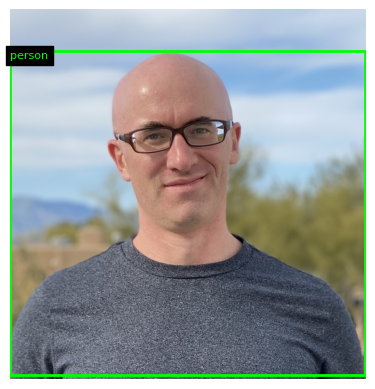

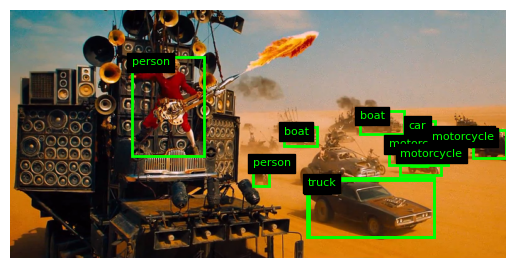

In [5]:
# get detections for image_file
detections = object_detector(test_img_dir_files)

for i, img_file in enumerate(test_img_dir_files):
    img = Image.open(img_file)
    utilities_image.image_plot_detections(img, detections[i])

## 1.2 Video

In [6]:
input_path = test_video_dir + '/test_1_short.mp4'
output_path = test_video_dir + '/test_1_short_out.avi'

utilities_video.detect_objects_in_video(object_detector, 
                                        input_path, 
                                        output_path, 
                                        batch_size=1, 
                                        frame_resize=1)

 99%|█████████▉| 151/152 [01:31<00:00,  1.64frame/s]

The video was successfully saved


# 2.  Depth

In [49]:
model = 'vinvino02/glpn-nyu'
model = 'Intel/dpt-large'
depth_estimator = pipeline("depth-estimation", model=model)

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [50]:
img_file = test_img_dir_files[0]
img = Image.open(img_file)
depth_img = depth_estimator(img_file)

/Users/wattjer/Desktop/python_webcam/.venv/lib/python3.9/site-packages/transformers/pipelines/depth_estimation.py:103: RuntimeWarning: invalid value encountered in cast
  formatted = (output * 255 / np.max(output)).astype("uint8")


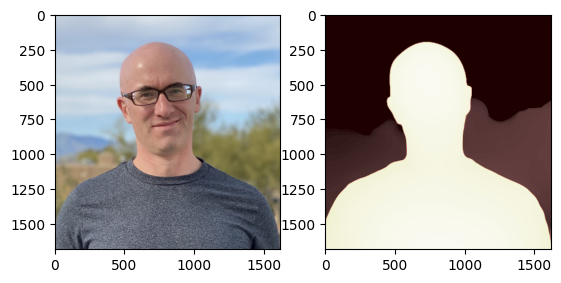

In [51]:
type(depth_img['depth'])

# Create figure and axes
fig, ax = plt.subplots(1,2)

# Display the img
ax[0].imshow(img);
ax[1].imshow(depth_img['depth'],cmap='pink');

# 3.  Segmentation

In [29]:
model = 'facebook/mask2former-swin-large-cityscapes-semantic'
segmenter = pipeline("image-segmentation", model=model)


In [31]:
img_file = test_img_dir_files[0]
img = Image.open(img_file)
segmented_img = segmenter(img_file)

`label_ids_to_fuse` unset. No instance will be fused.


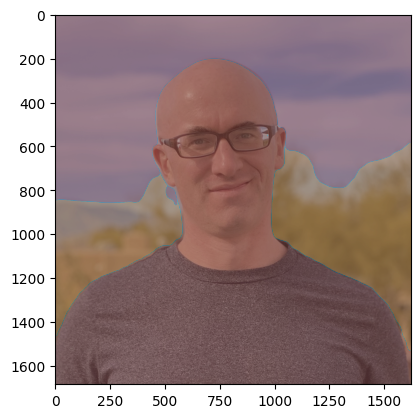

In [32]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Display the img
ax.imshow(img);

# display segmented_img
for i in range(len(segmented_img)):
    # random color for imshow 
    color = np.random.rand(3,)
    
    ax.imshow(segmented_img[i]['mask'], alpha=0.25)